In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns

In [2]:
import os
from PIL import Image
import re

# 图片所在的文件夹
folder_path = '/home/mjy/project/bilinear_network/gait_recognition/001-1-000-001-skeleton'

# 创建空列表来存储灰度图像
gray_images = []

# 用于从文件名中提取数字的函数
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

# 获取文件夹中的所有文件，然后排序
filenames = os.listdir(folder_path)
filenames.sort(key=natural_keys)

# 遍历文件夹中的所有文件
for filename in filenames:
    # 检查文件是否是图片
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # 打开图片
        img = Image.open(os.path.join(folder_path, filename))
        # 转换为灰度
        gray_img = img.convert('L')
        # 将灰度图像添加到列表
        gray_images.append(gray_img)

print('All images have been converted to grayscale and stored in the list.')


All images have been converted to grayscale and stored in the list.


In [2]:
len(gray_images)

50

In [4]:
from PIL import Image
import numpy as np

# 打开图片
img = Image.open('001-1-000-001-001.jpg')

# 将图片转换为灰度模式
img_gray = img.convert('L')

# 将图片转化为 NumPy 数组
img_array = np.array(img_gray)

# 打印数组
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
img_array.shape

(480, 640)

In [2]:
plt.imshow(gray_images[1], cmap='gray')

NameError: name 'plt' is not defined

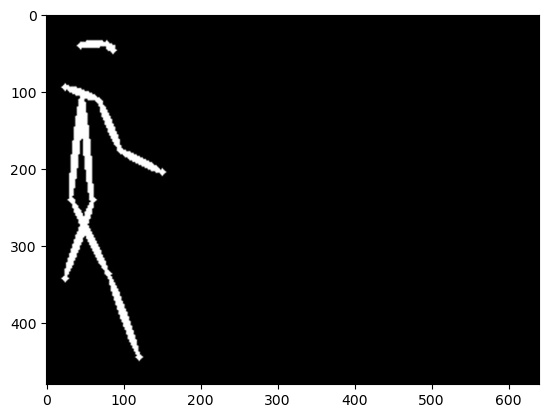

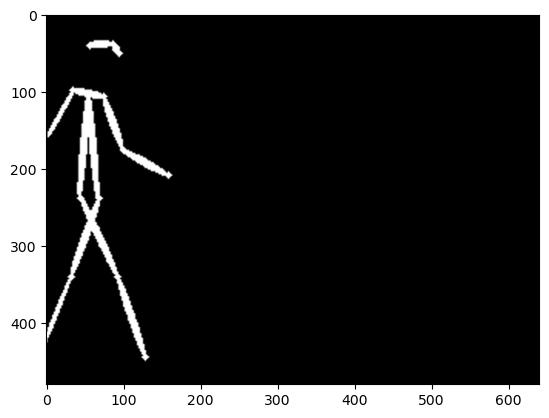

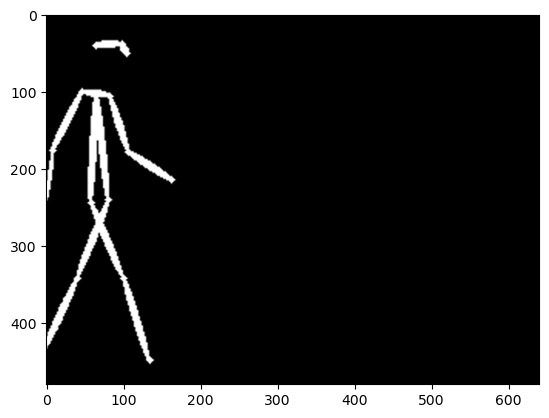

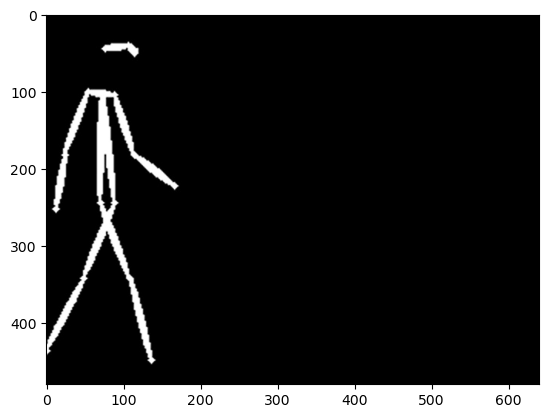

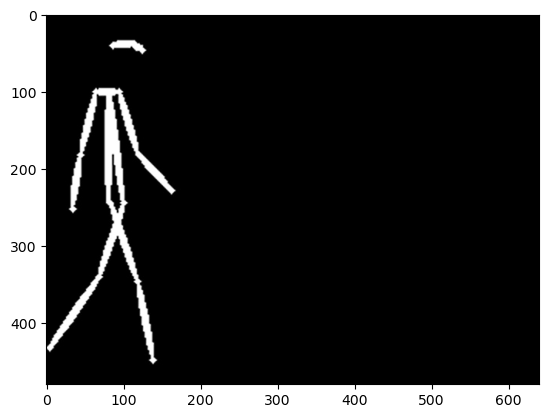

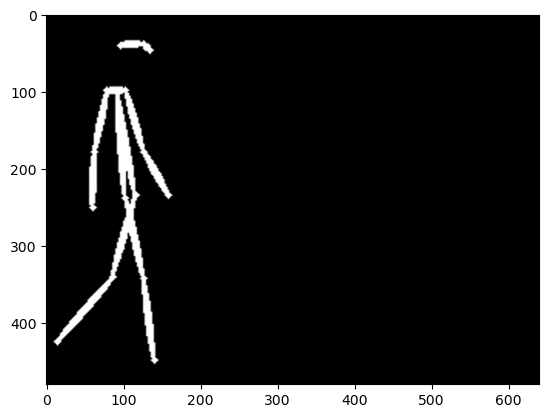

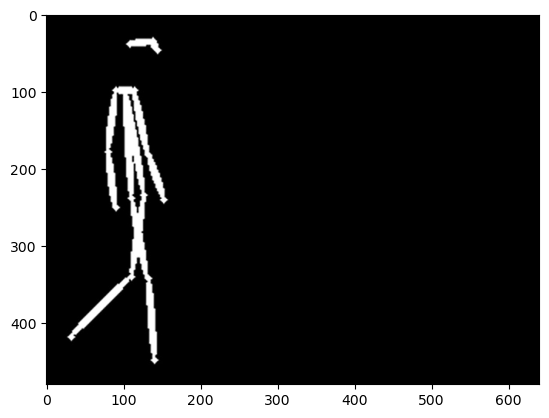

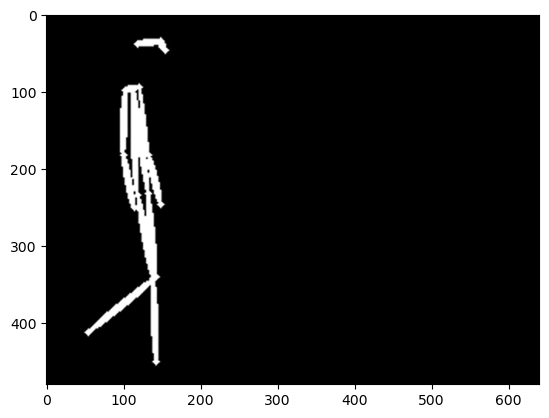

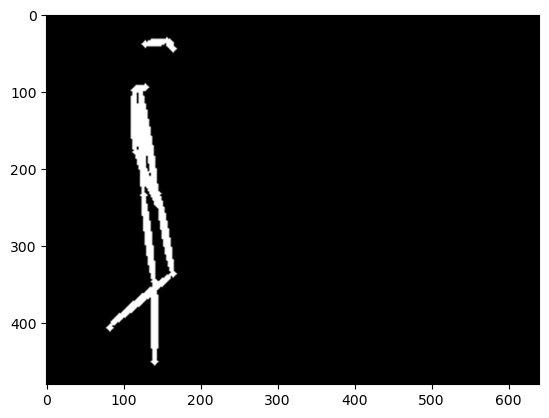

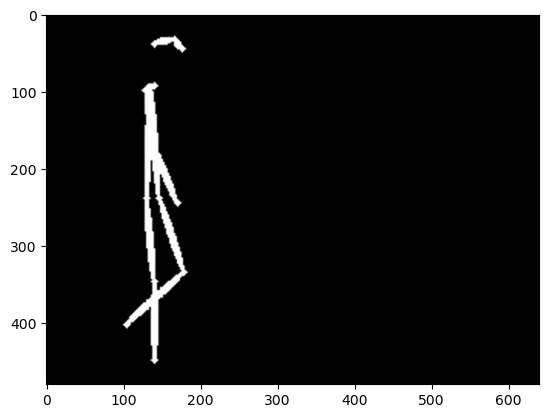

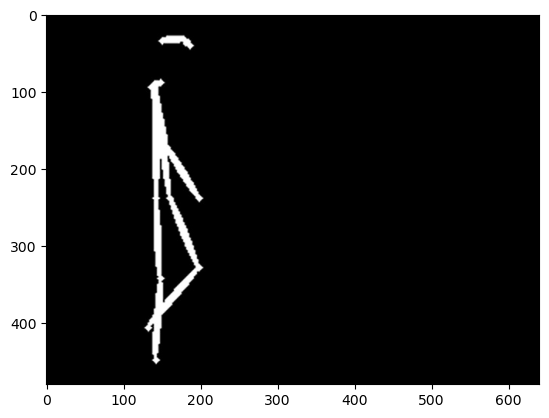

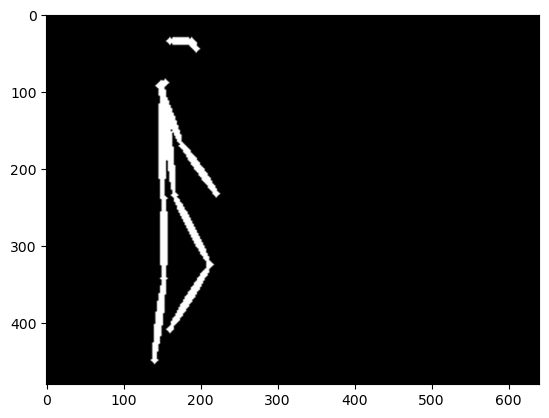

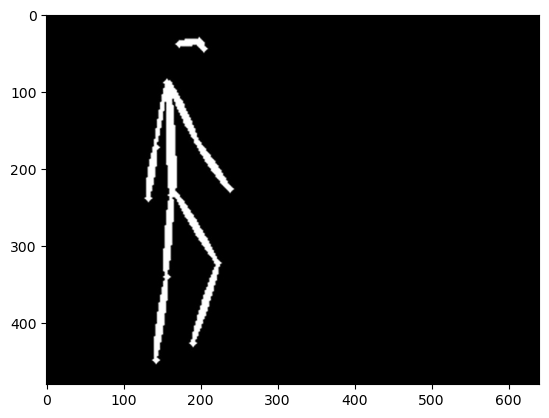

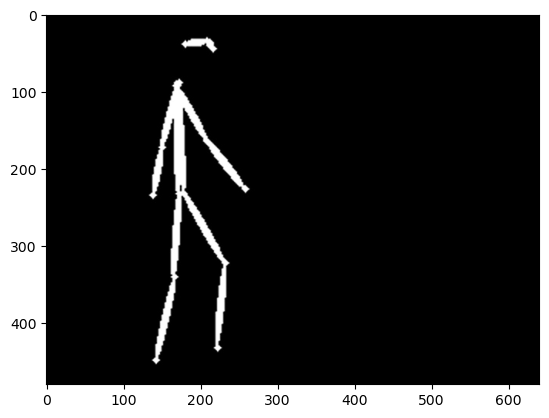

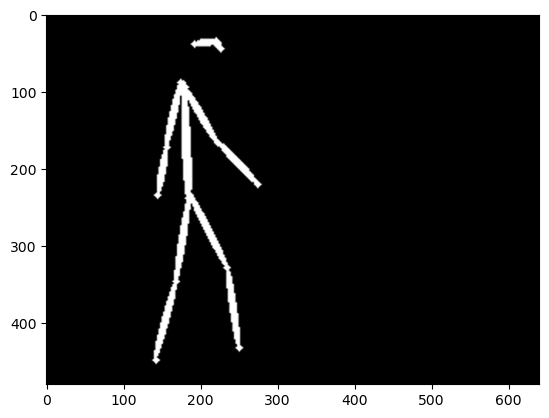

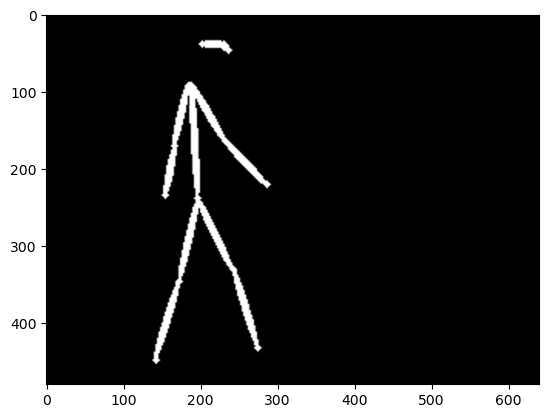

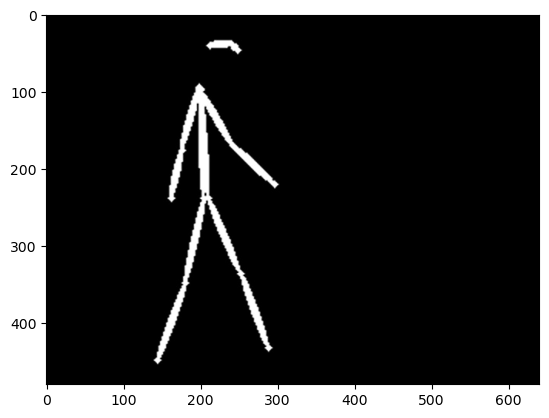

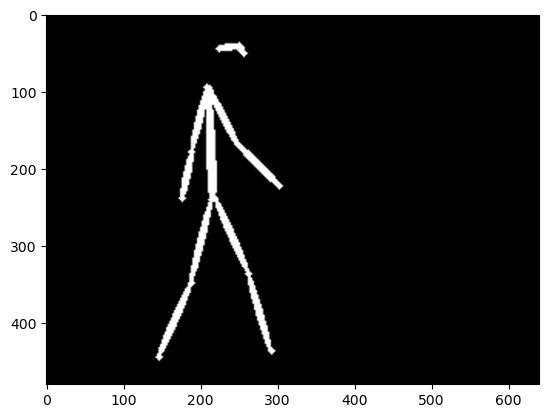

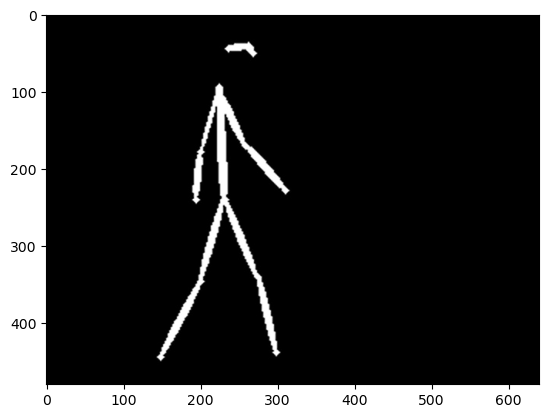

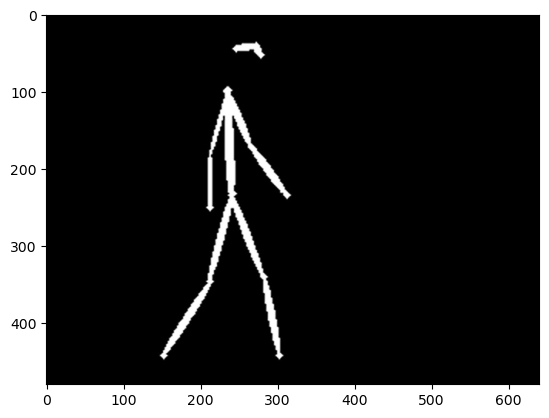

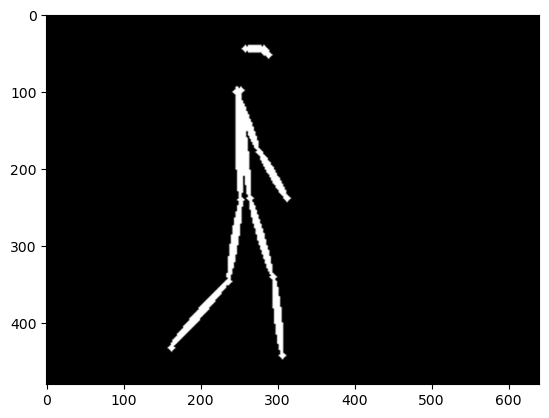

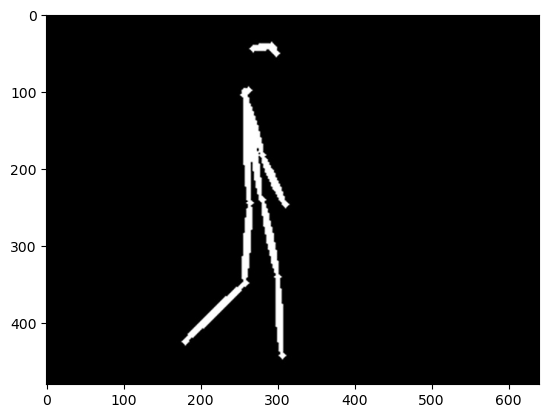

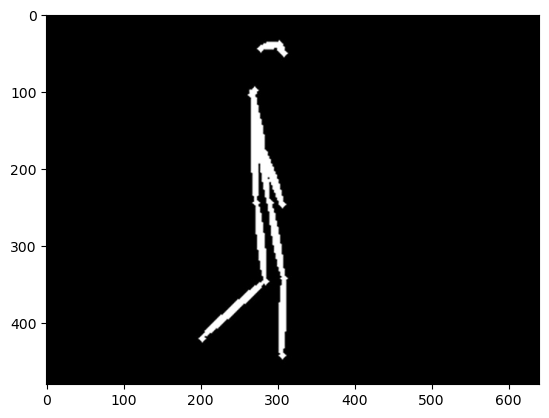

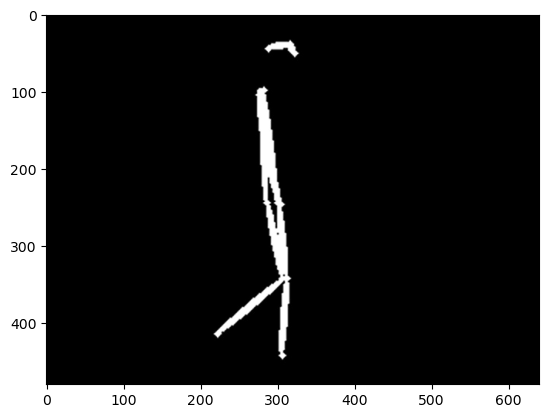

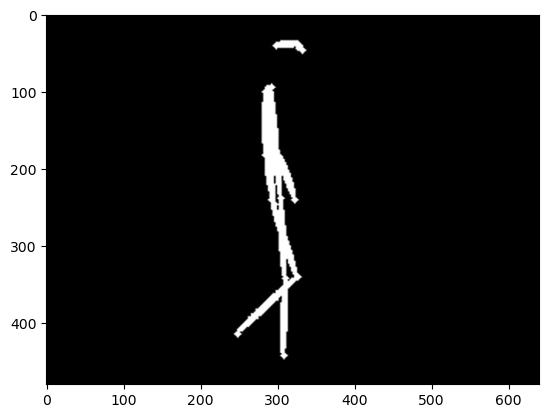

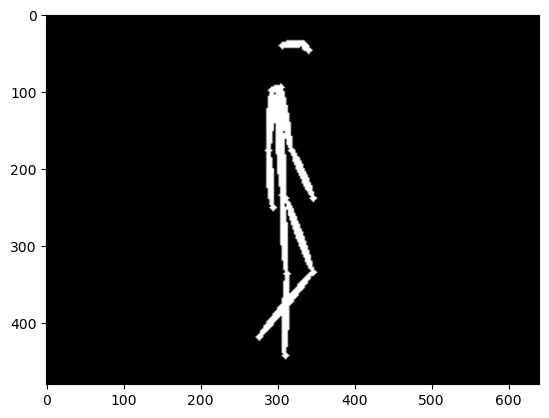

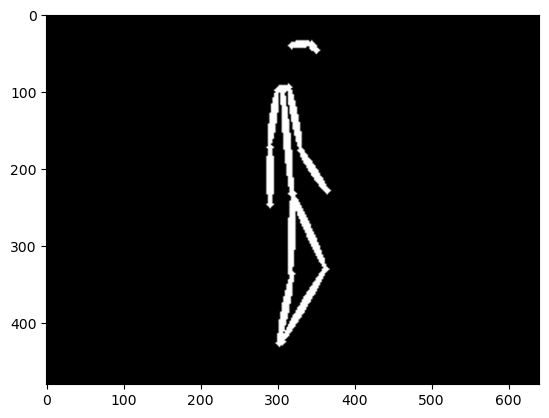

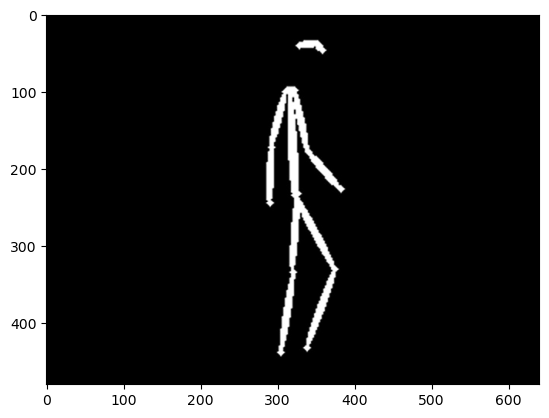

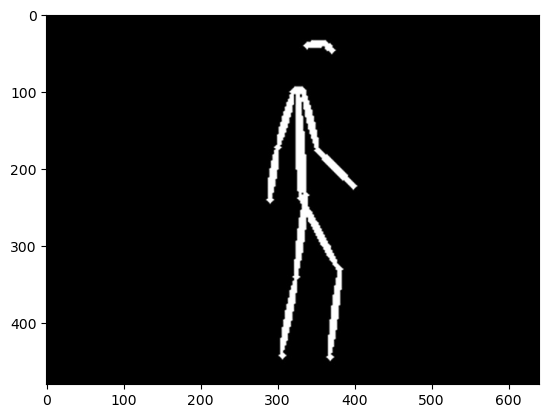

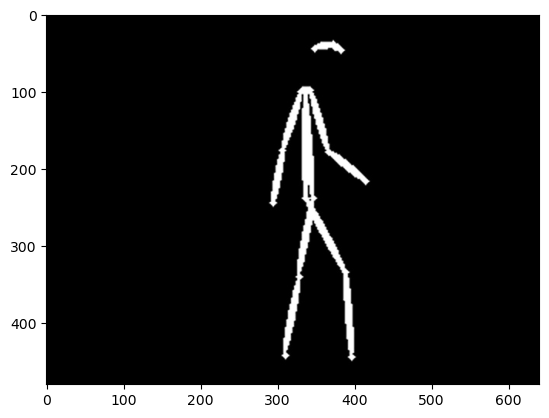

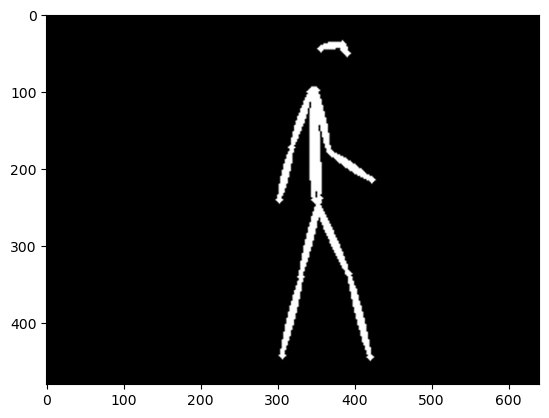

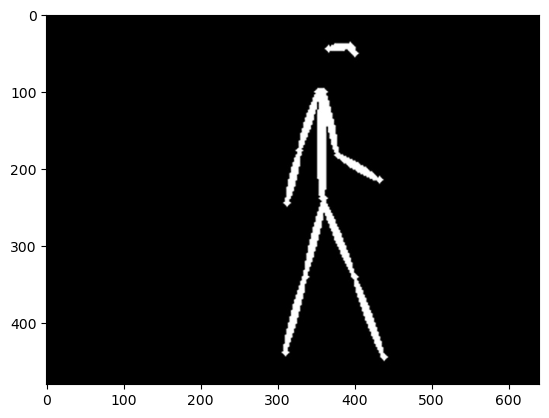

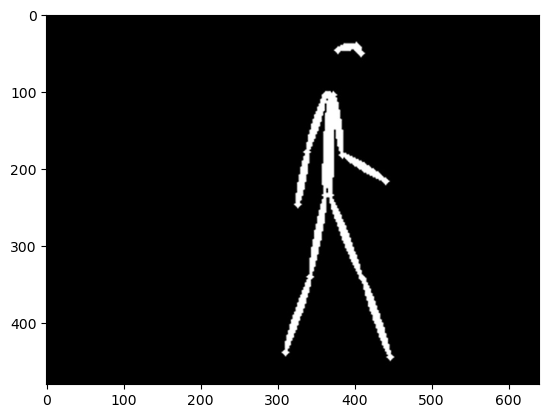

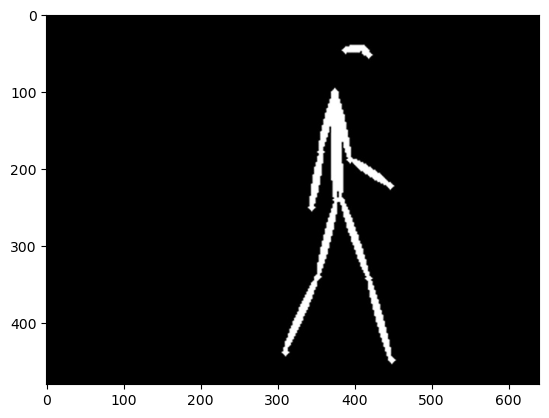

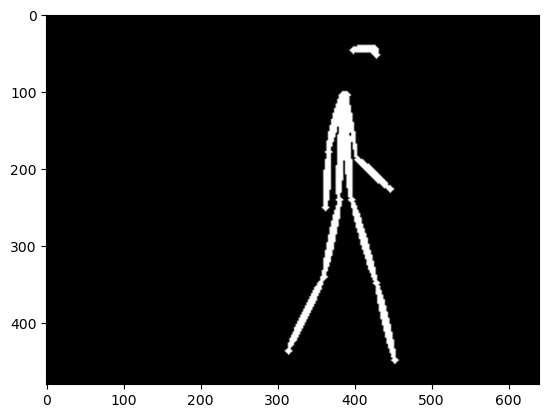

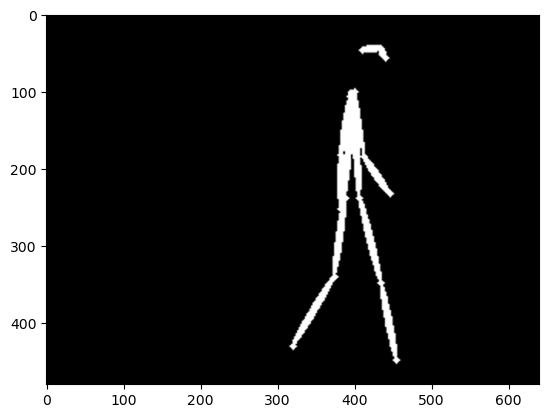

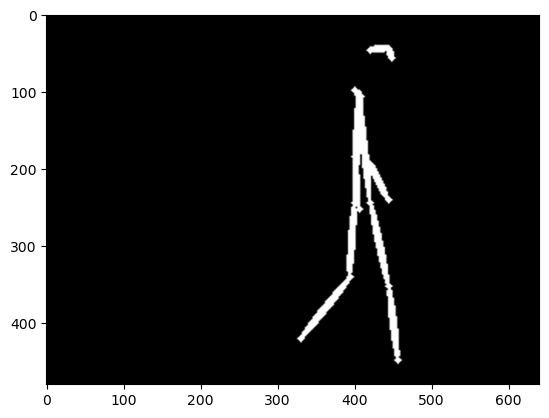

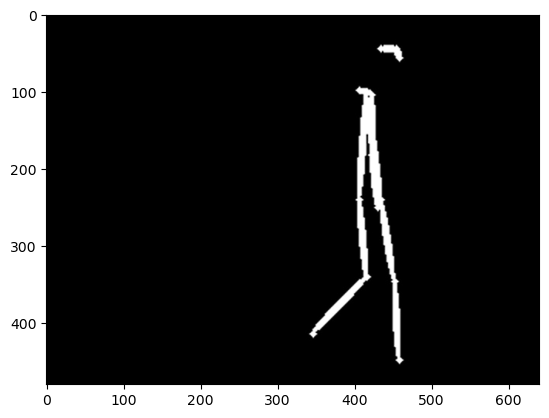

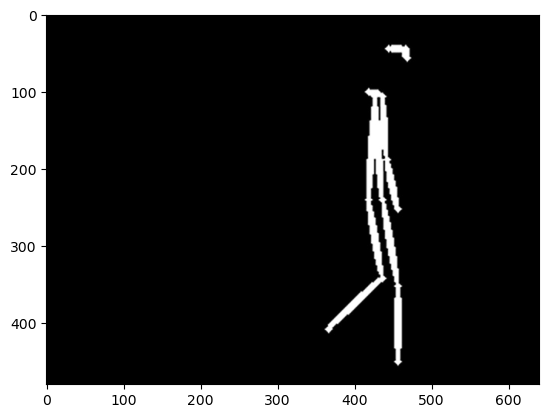

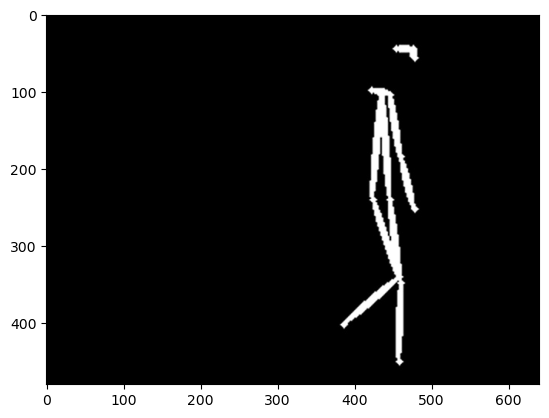

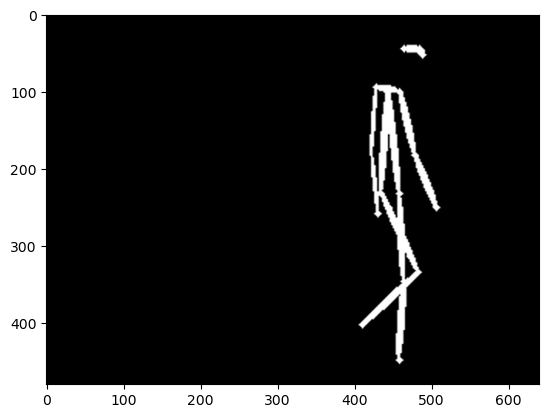

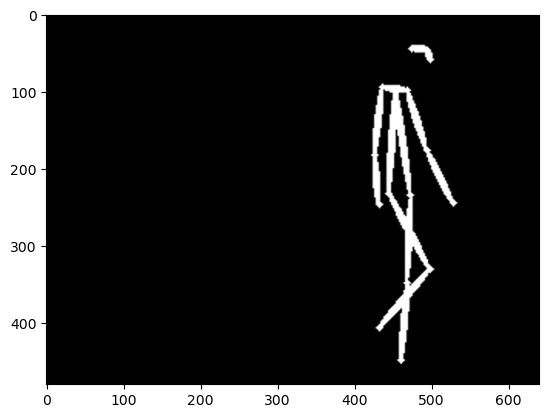

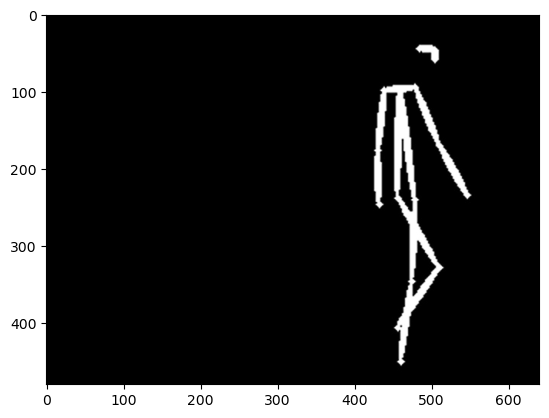

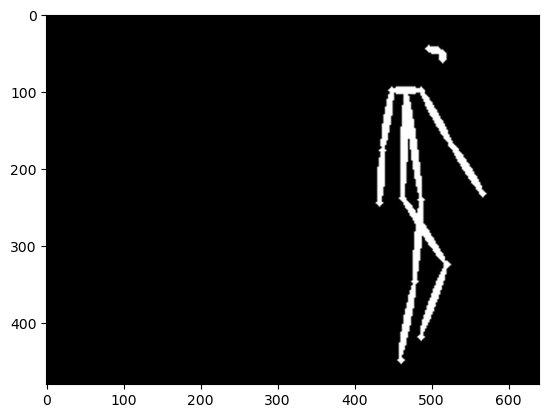

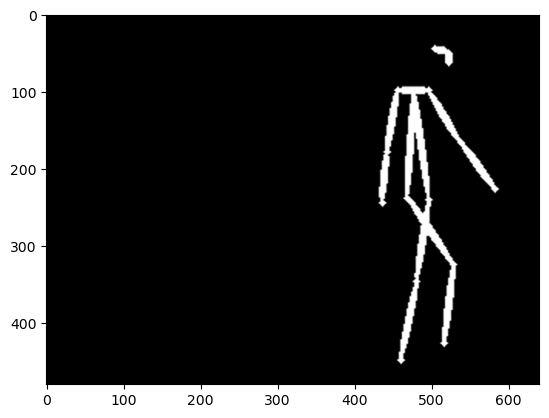

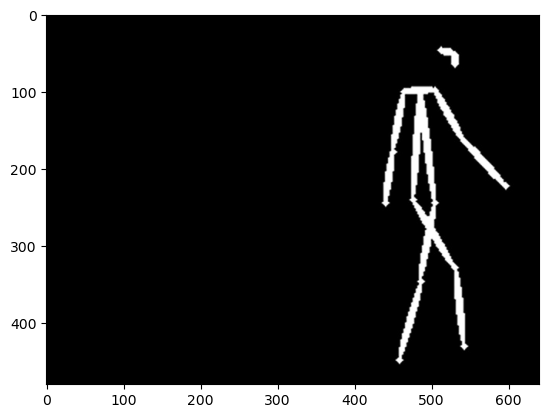

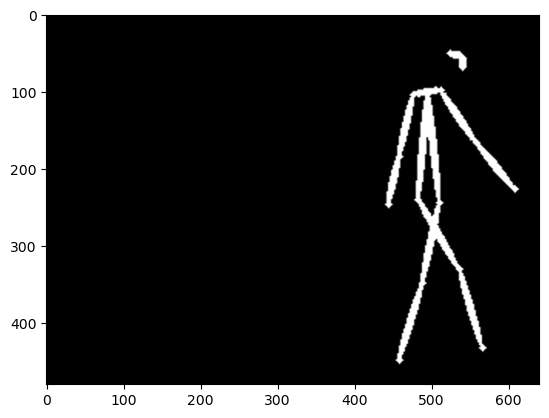

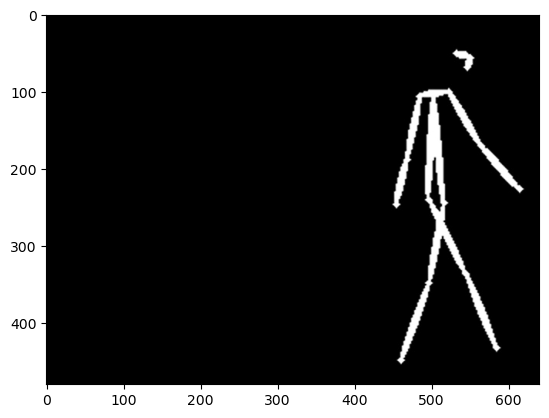

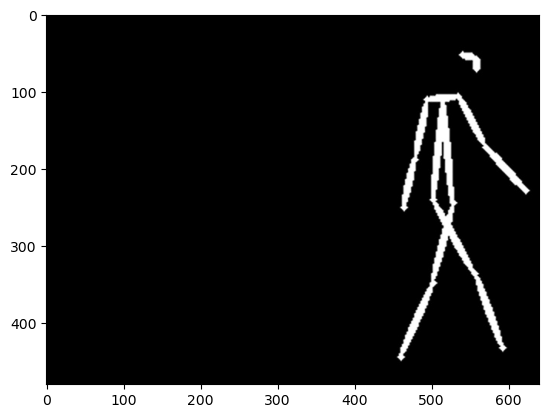

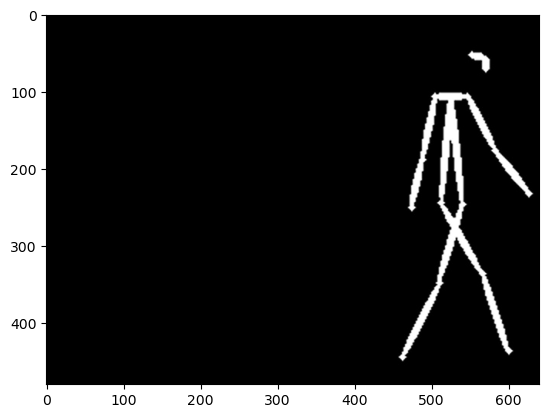

In [3]:
for image in gray_images:
    plt.imshow(image, cmap='gray')
    plt.show()

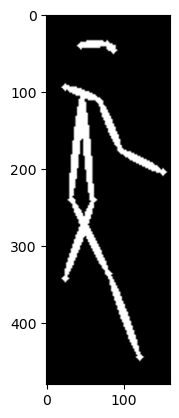

In [7]:
import matplotlib.pyplot as plt

# 使用matplotlib来显示图像
plt.imshow(img_array[:,:160], cmap='gray')
plt.savefig('figure/2', bbox_inches='tight')
plt.show()
# plt.savefig('figure/1')


In [19]:
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
a = img_array[:,:160]
b = a[::7, ::7]

In [11]:
b.shape

(69, 23)

In [23]:
indices = np.where((a != 0) & (a != 1))

# 打印出这些位置
print(indices)


(array([ 32,  32,  32, ..., 455, 455, 455]), array([ 43,  49,  50, ..., 113, 118, 127]))


In [13]:
b[np.where(b>0)] = 1

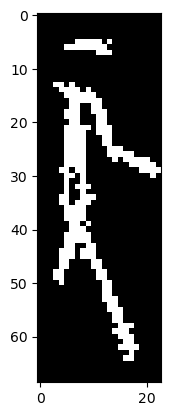

In [14]:
plt.imshow(b, cmap='gray')
# plt.savefig('figure/3', bbox_inches='tight')
plt.show()


In [3]:
import os
from PIL import Image
import numpy as np
import re

# 图片所在的文件夹
folder_path = '/home/mjy/project/bilinear_network/gait_recognition/001-1-000-001-skeleton'

# 创建空列表来存储灰度图像
gray_images = []
crop_width = 160  # 需要截取的图片宽度

# 用于从文件名中提取数字的函数
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

# 获取文件夹中的所有文件，然后排序
filenames = os.listdir(folder_path)
filenames.sort(key=natural_keys)

# 遍历文件夹中的所有文件
for filename in filenames:
    # 检查文件是否是图片
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # 打开图片
        img = Image.open(os.path.join(folder_path, filename)).convert('L')
        # 将图片转换为numpy数组
        img_array = np.array(img)
        # 找到每一列是否存在非零元素
        non_zeros = np.any(img_array > 0, axis=0)
        # 找到最左边和最右边非零列的索引
        left_index, right_index = np.where(non_zeros)[0][[0, -1]]
        # 计算中点
        center = (left_index + right_index) // 2
        # 截取图片
        left = max(0, center - crop_width // 2)
        right = min(img.width, center + crop_width // 2)
        cropped_img = img.crop((left, 0, right, img.height))
        # 将灰度图像添加到列表
        gray_images.append(cropped_img)

print('All images have been cropped and stored in the list.')


All images have been cropped and stored in the list.


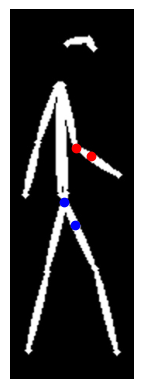

In [58]:
plt.imshow(gray_images[30], cmap='gray')
plt.plot(105, 190, 'ro')
plt.plot(85, 180, 'ro')
plt.plot(70, 250, 'bo')
plt.plot(84, 280, 'bo')
plt.axis('off')
plt.savefig('figure/corr_points_2', bbox_inches='tight', dpi=800)

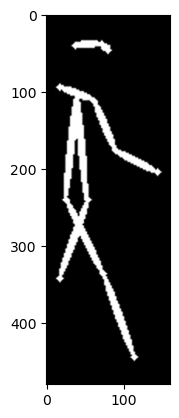

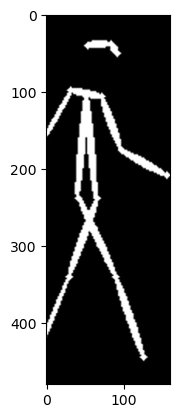

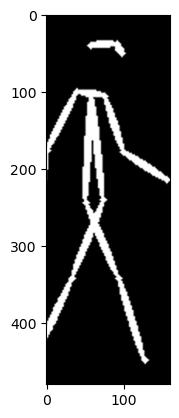

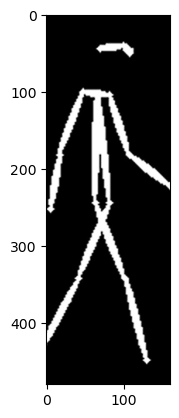

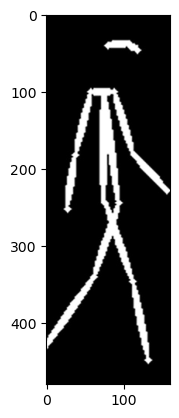

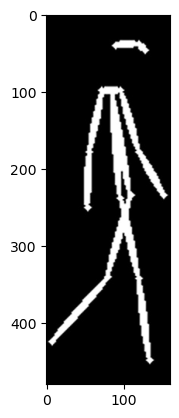

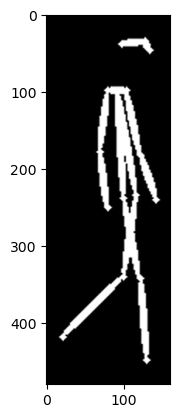

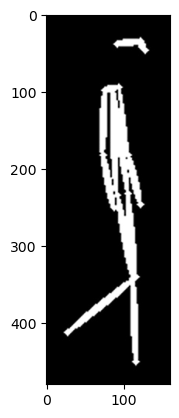

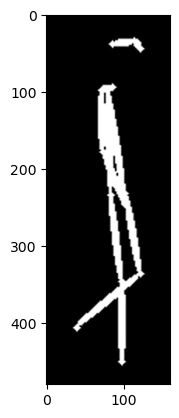

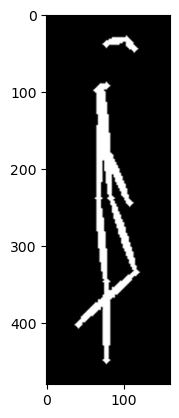

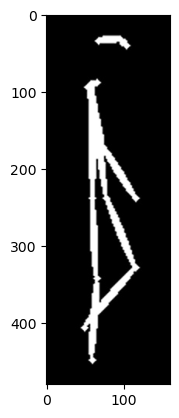

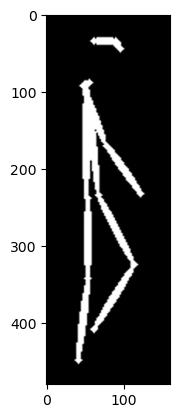

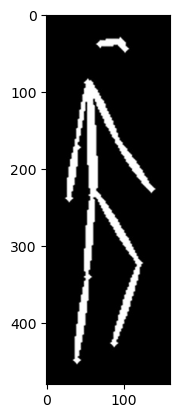

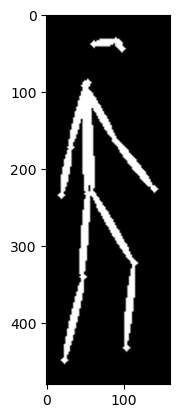

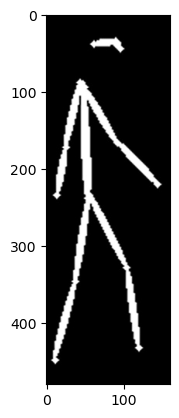

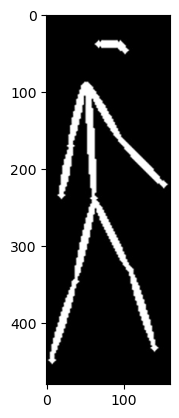

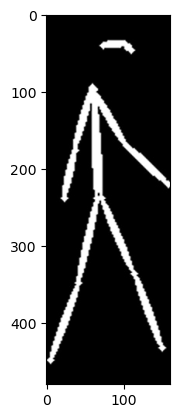

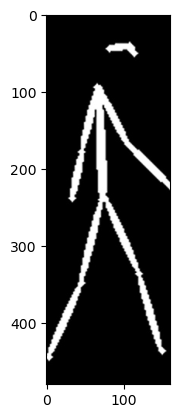

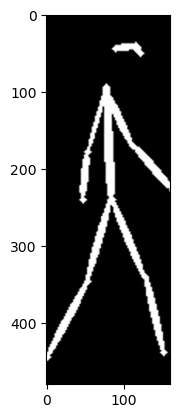

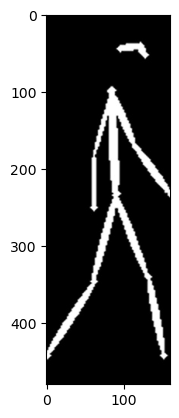

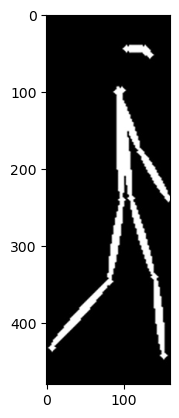

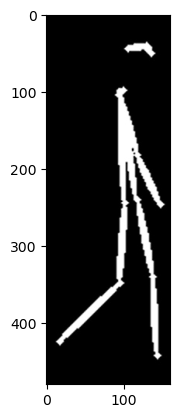

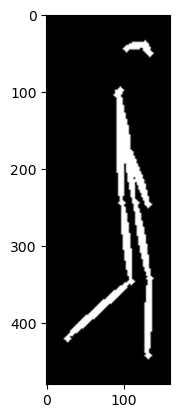

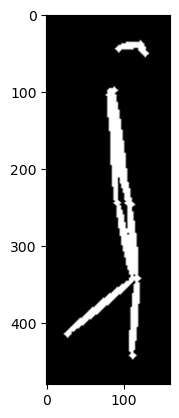

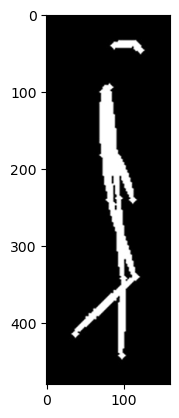

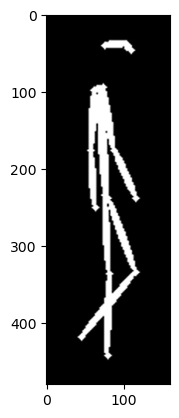

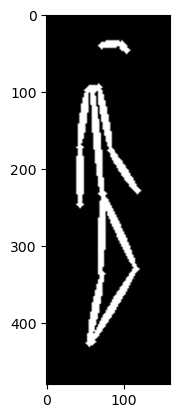

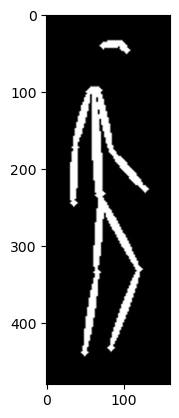

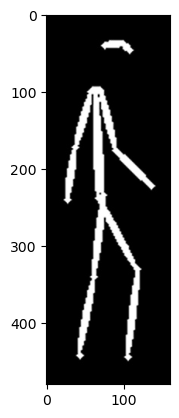

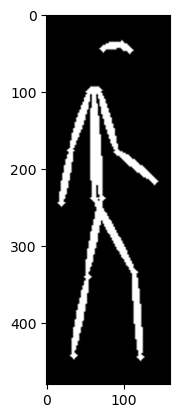

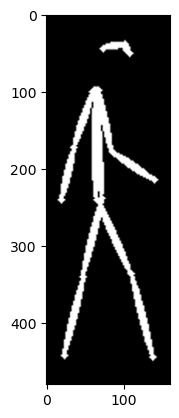

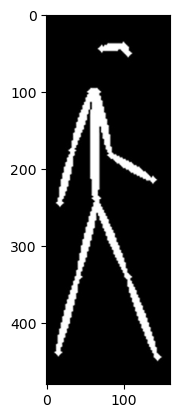

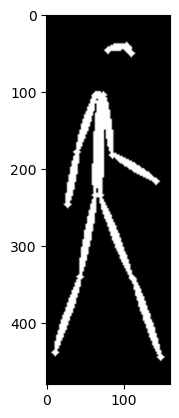

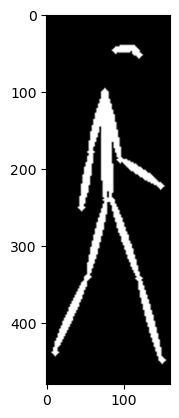

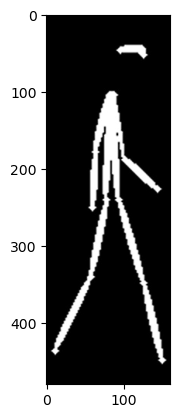

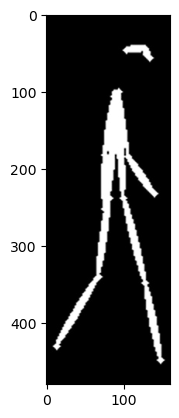

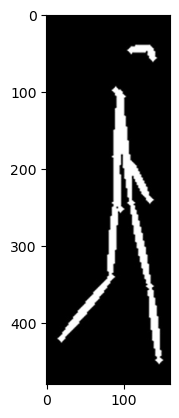

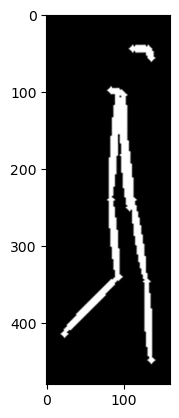

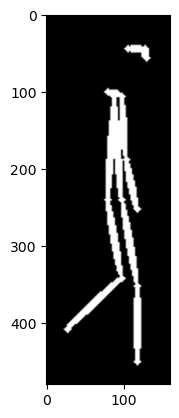

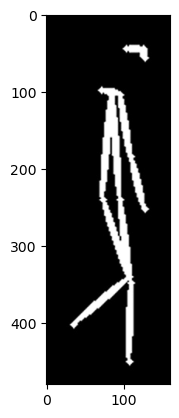

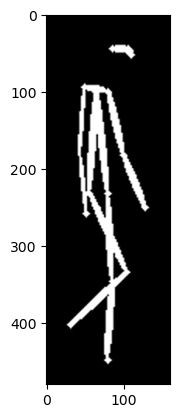

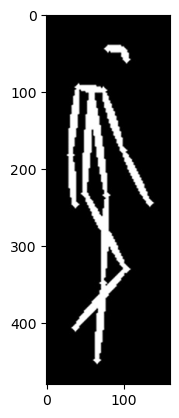

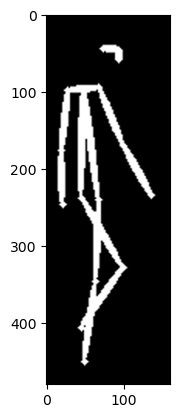

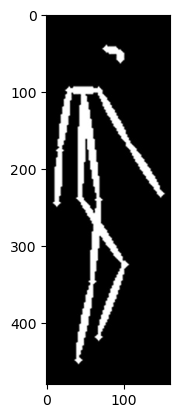

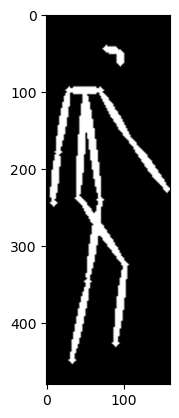

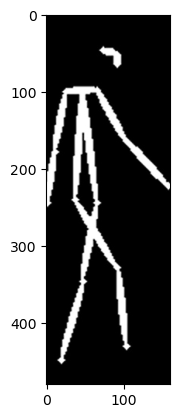

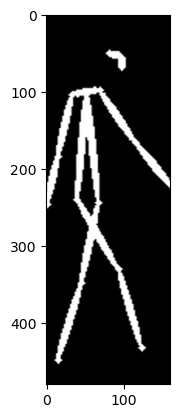

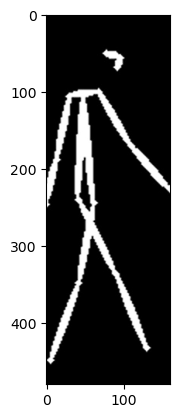

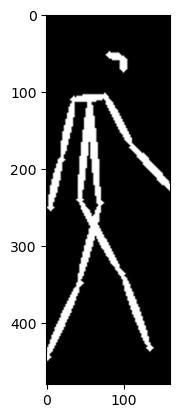

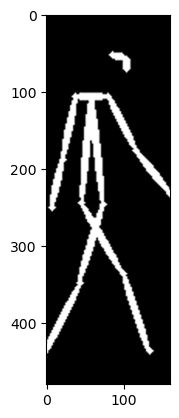

In [8]:
for image in gray_images:
    plt.imshow(image, cmap='gray')
    plt.show()

In [7]:
type(gray_images), len(gray_images)

(list, 50)

In [9]:
type(gray_images[0])

PIL.Image.Image

In [95]:
gray_images_np = np.array([np.array(img) for img in gray_images])
gray_images_np = gray_images_np / 256

In [96]:
gray_images_np[0, 50, 80]
gray_images_np.sum()

404671.3203125

In [97]:
gray_images_np.shape

(50, 480, 160)

In [98]:
gray_images_np = gray_images_np[:, 100:400:5, 10:150:5]

In [37]:
for i in range(10):
    for j in range(10):
        print(np.dot(gray_images_np[:, i, 0], gray_images_np[:, i, j]) / (np.linalg.norm(gray_images_np[:, i, 0]) * np.linalg.norm(gray_images_np[:, i, j])))
        print(i, j)

1.0
0 0
0.9491215034107952
0 1
0.8868686573787611
0 2
0.7486414220685002
0 3
0.6224764497280658
0 4
0.4279267489348503
0 5
0.322016605806996
0 6
0.2848645160030993
0 7
0.25466998042641764
0 8
0.14919933895095483
0 9
1.0000000000000002
1 0
0.9458978818459873
1 1
0.8835141058964456
1 2
0.7447110426655308
1 3
0.6207817829753118
1 4
0.43854860254009154
1 5
0.317727110624531
1 6
0.2713735353670625
1 7
0.21695559705084194
1 8
0.1325357927675324
1 9
1.0000000000000002
2 0
0.9376875055233868
2 1
0.8737353401768093
2 2
0.7320442488530935
2 3
0.6049340621638344
2 4
0.4259738980637516
2 5
0.3093020118410274
2 6
0.2466343267502811
2 7
0.19503344130488903
2 8
0.12317367249855171
2 9
1.0000000000000002
3 0
0.9410536320686648
3 1
0.8535211841353806
3 2
0.7020859641333168
3 3
0.5699768587579918
3 4
0.38438367233986837
3 5
0.27623635377491434
3 6
0.21771143275650034
3 7
0.17982154225681327
3 8
0.1386878715645365
3 9
1.0
4 0
0.9393079618400284
4 1
0.853154736444497
4 2
0.6718687662222902
4 3
0.522742565

In [99]:
gray_images_np_re = gray_images_np.reshape(gray_images_np.shape[0], gray_images_np.shape[1]*gray_images_np.shape[2])

In [100]:
gray_images_np_re.shape

(50, 1680)

In [101]:
b = []

In [102]:
b = []
for i in range(gray_images_np_re.shape[1]):
    if i % 100 == 0:
        print(i)
    for j in range(gray_images_np_re.shape[1]):
        if np.linalg.norm(gray_images_np_re[:,i]) == 0 or np.linalg.norm(gray_images_np_re[:,j]) == 0:
            b.append(0)
        else:
            b.append(np.dot(gray_images_np_re[:,i], gray_images_np_re[:,j]) / (np.linalg.norm(gray_images_np_re[:,i]) * np.linalg.norm(gray_images_np_re[:,j])))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [89]:
len(b)

589824

In [103]:
cos = np.array(b).reshape(gray_images_np_re.shape[1], gray_images_np_re.shape[1])

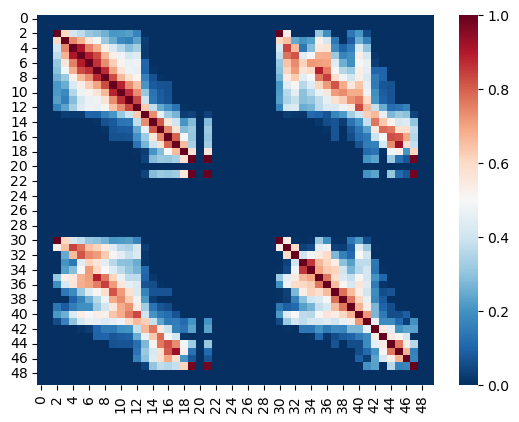

In [106]:
sns.heatmap(cos[:50, :50], cmap='RdBu_r', vmin=0, vmax=1)
plt.savefig('figure/heatmap', bbox_inches='tight', dpi=800)

In [29]:
np.max(b), np.argmax(b)

(0.999994659017313, 25858)

In [32]:
len(np.where(np.array(b) > 0.9)[0])

11913

In [17]:
a = 25858
b = 799
while a>0:
    a = a - b
    b = b - 1
print(a, b)

-747 765


In [20]:
(799+767)*33/2

25839.0

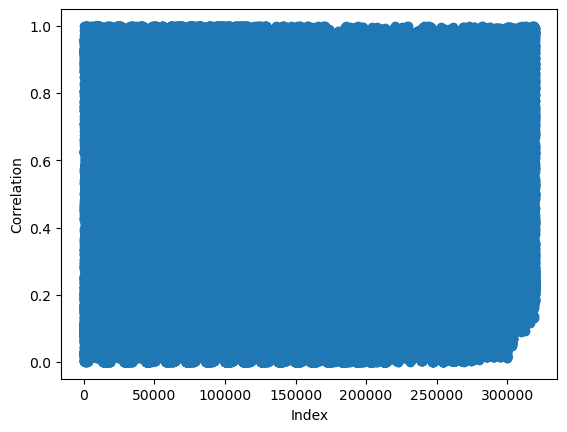

In [13]:
idx = np.arange(len(b))
plt.scatter(idx, b)
plt.xlabel('Index')
plt.ylabel('Correlation')
plt.show()

In [17]:
corr = np.corrcoef(gray_images_np_re, rowvar=False)

# 将相关系数展平成一维数组
corr_flat = corr.flatten()
idx = np.arange(len(corr_flat))

# 绘制柱状图
plt.bar(idx, corr_flat)
plt.xlabel('Index')
plt.ylabel('Correlation')
plt.show()

KeyboardInterrupt: 

In [44]:
a = gray_images_np[:, 50, 80]

In [45]:
a[0]

0.98828125

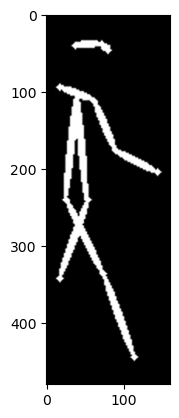

In [12]:
plt.imshow(gray_images_np[0], cmap='gray')

In [1]:
import os
from PIL import Image
import numpy as np
import re

# 图片所在的文件夹
folder_path = '/home/mjy/project/bilinear_network/gait_recognition/001-1-000-001-skeleton'
# 保存裁剪和转换后图片的文件夹
output_folder_path = '/home/mjy/project/bilinear_network/gait_recognition/crop_figure'

# 创建空列表来存储灰度图像
gray_images = []
crop_width = 160  # 需要截取的图片宽度

# 用于从文件名中提取数字的函数
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

# 获取文件夹中的所有文件，然后排序
filenames = os.listdir(folder_path)
filenames.sort(key=natural_keys)

# 遍历文件夹中的所有文件
for filename in filenames:
    # 检查文件是否是图片
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # 打开图片
        img = Image.open(os.path.join(folder_path, filename)).convert('L')
        # 将图片转换为numpy数组
        img_array = np.array(img)
        # 找到每一列是否存在非零元素
        non_zeros = np.any(img_array > 0, axis=0)
        # 找到最左边和最右边非零列的索引
        left_index, right_index = np.where(non_zeros)[0][[0, -1]]
        # 计算中点
        center = (left_index + right_index) // 2
        # 截取图片
        left = max(0, center - crop_width // 2)
        right = min(img.width, center + crop_width // 2)
        cropped_img = img.crop((left, 0, right, img.height))
        # 将灰度图像添加到列表
        gray_images.append(cropped_img)
        # 保存裁剪后的图片为.jpg格式
        cropped_img.save(os.path.join(output_folder_path, 'cropped_' + filename), 'JPEG')

print('All images have been cropped and saved as .jpg files.')


All images have been cropped and saved as .jpg files.
